<a href="https://colab.research.google.com/github/psa2001/msu_ml_spring_2022/blob/main/Pyatkovskiy_KNN_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Общая информация

**Срок сдачи:** 5 апреля 2022, 08:30 

**Штраф за опоздание:** по 1 баллу за 24 часа задержки. Через 5 дней домашнее задание сгорает.

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0220, Задание 1] Фамилия Имя.

Используйте данный Ipython Notebook при оформлении домашнего задания.


**Штрафные баллы:**

1. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -0.5 баллов
2. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -0.5 баллов


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import BaseEstimator
from sklearn.datasets import fetch_openml, fetch_20newsgroups
#from sklearn.datasets import fetch_mldata, fetch_20newsgroups

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import pairwise_distances as pair_dist
from sklearn.neighbors import KDTree
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Задание 1 (1 балл)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. 
Для подсчета расстояний можно использовать функции [отсюда](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [3]:
class MyKNeighborsClassifier(BaseEstimator):
    
    def __init__(self, n_neighbors, algorithm='brute', metric = 'euclidean'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
        self.metric = metric
    
    
    def fit(self, X, y):
        self.X_train = X
        self.Y_train = y


    def predict(self, X):
        def closest_label(data):
            return np.argmax(np.bincount(data))
        if(self.algorithm == 'brute'):
            best_neigh = np.argsort(pair_dist(X, self.X_train, metric=self.metric), axis=1)[:, :self.n_neighbors]
        if(self.algorithm == 'kd_tree'):
            tree = KDTree(self.X_train, leaf_size=2)
            idx, best_neigh = tree.query(X, k=self.n_neighbors)
        best_y_neigh = self.Y_train[best_neigh]
        y_predicted = np.apply_along_axis(closest_label, 1, best_y_neigh)
        return y_predicted

**IRIS**

В библиотеке scikit-learn есть несколько датасетов из коробки. Один из них [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [4]:
iris = datasets.load_iris()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [6]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='brute')

In [7]:
clf.fit(X_train, y_train)
my_clf.fit(X_train, y_train)

In [8]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((135, 4), (15, 4), (135,), (15,))

In [10]:
abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ))

0.0

### Задание 2 (0.5 балла)

Давайте попробуем добиться скорости работы на fit, predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. 

In [11]:
%time clf.fit(X_train, y_train)

CPU times: user 372 µs, sys: 104 µs, total: 476 µs
Wall time: 482 µs


KNeighborsClassifier(algorithm='brute', n_neighbors=2)

In [12]:
%time my_clf.fit(X_train, y_train)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 11.2 µs


In [13]:
%time clf.predict(X_test)

CPU times: user 4.76 ms, sys: 207 µs, total: 4.97 ms
Wall time: 5 ms


array([1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2])

In [14]:
%time my_clf.predict(X_test)

CPU times: user 757 µs, sys: 0 ns, total: 757 µs
Wall time: 766 µs


array([1, 1, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 2, 0, 2])

### Задание 3 (1 балл)
Добавьте algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Необходимо добиться скорости работы на fit,  predict сравнимой со sklearn для iris. Допускается замедление не более чем в 2 раза. 
Для этого используем numpy. Точность не должна уступать значению KNN из sklearn. 

In [15]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [17]:
%time clf.fit(X_train, y_train)

CPU times: user 1.08 ms, sys: 0 ns, total: 1.08 ms
Wall time: 1.24 ms


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [18]:
%time my_clf.fit(X_train, y_train)

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 11.9 µs


In [19]:
%time clf.predict(X_test)

CPU times: user 2.44 ms, sys: 1.12 ms, total: 3.56 ms
Wall time: 4.38 ms


array([0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1])

In [20]:
%time my_clf.predict(X_test)

CPU times: user 487 µs, sys: 710 µs, total: 1.2 ms
Wall time: 1.53 ms


array([0, 1, 0, 2, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1])

In [21]:
sklearn_pred = clf.predict(X_test)
my_clf_pred = my_clf.predict(X_test)
assert abs( accuracy_score(y_test, my_clf_pred) -  accuracy_score(y_test, sklearn_pred ) )<0.005, "Score must be simillar"

### Задание 4 (2.5 балла)

Рассмотрим новый датасет 20 newsgroups

In [22]:
newsgroups = fetch_20newsgroups(subset='train',remove=['headers','footers', 'quotes'])

In [23]:
data = newsgroups['data']
target = newsgroups['target']

Преобразуйте текстовые данные из data с помощью [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Словарь можно ограничить по частотности.

In [24]:
vectorizer = CountVectorizer(max_features = 1000)
X = vectorizer.fit_transform(data)
features_names = vectorizer.get_feature_names_out()
vectorized_data = X.toarray()

*Так мы получили векторное представление наших текстов. Значит можно приступать к задаче обучения модели*

Реализуйте разбиение выборки для кросс-валидации на 3 фолдах. Разрешено использовать sklearn.cross_validation

In [26]:
from sklearn.model_selection import KFold

def get_res_from_validation(num_folds, X, y, metric, trainer):
    kf = KFold(n_splits=num_folds)
    results = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        trainer.fit(X_train, y_train)
        pred_y = trainer.predict(X_test)
        cur_metric = metric(pred_y, y_test)
        results.append(cur_metric)
    return results

Напишите метод, позволяющий найти оптимальное количество ближайших соседей(дающее максимальную точность в среднем на валидации на 3 фолдах).
Постройте график зависимости средней точности от количества соседей. Можно рассмотреть число соседей от 1 до 10.

In [27]:
def training_with_parameters(type_of_vectorizer, data, target):
    if(type_of_vectorizer == 1):
        vectorizer = CountVectorizer(max_features = 1000)
    else:
        vectorizer = TfidfVectorizer(max_features = 1000)
    X = vectorizer.fit_transform(data)
    features_names = vectorizer.get_feature_names_out()
    vectorized_data = X.toarray()
    brute_results_eucl = []
    brute_results_cosine = []
    cur_num_folds = 3
    cur_algorithm = 'brute'
    for cur_n_neighbors in range(1, 11):
        #print(cur_n_neighbors)
        for cur_metric in ['euclidean', 'cosine']:
            #print(cur_metric)
            my_clf = MyKNeighborsClassifier(n_neighbors=cur_n_neighbors, algorithm=cur_algorithm, metric=cur_metric)
            results = get_res_from_validation(num_folds=cur_num_folds, X=vectorized_data, y=target, metric=accuracy_score, trainer=my_clf)
            cur_res = np.mean(np.array(results))
            if(cur_metric == 'euclidean'):
                brute_results_eucl.append(cur_res)
            else:
                brute_results_cosine.append(cur_res)
    return brute_results_eucl, brute_results_cosine

In [28]:
CountVectorizer_brute_results_eucl, CountVectorizer_brute_results_cosine = training_with_parameters(1, data, target)
tfidf_brute_results_eucl, tfidf__brute_results_cosine = training_with_parameters(2, data, target)

Как изменится качество на валидации, если:

1. Используется косинусная метрика вместо евклидовой.
2. К текстам применяется TfIdf векторизацию( sklearn.feature_extraction.text.TfidfVectorizer)

Сравните модели, выберите лучшую.

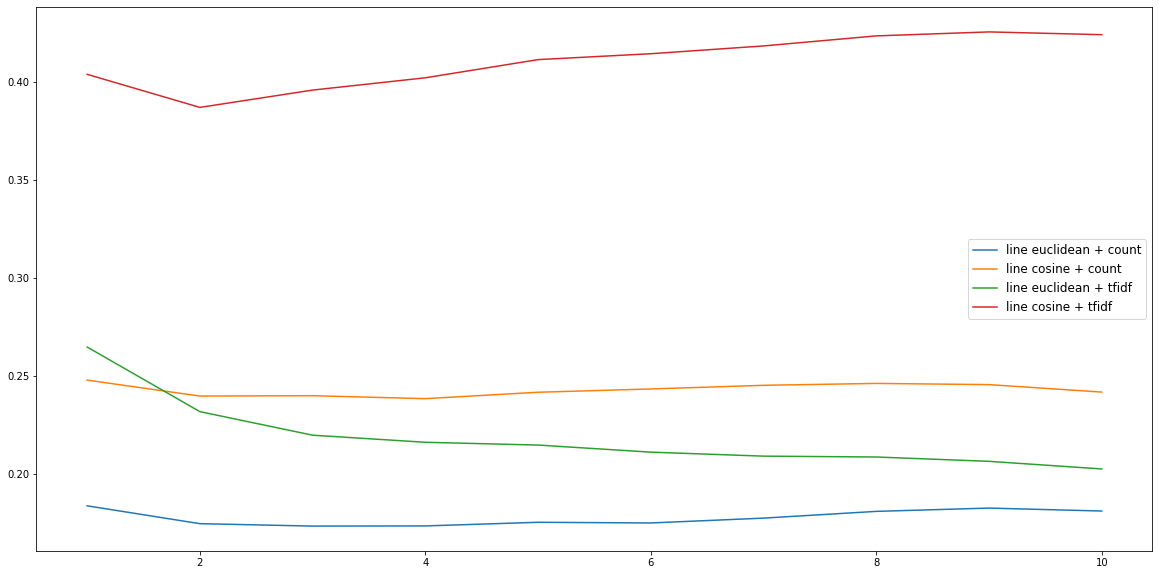

In [29]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_eucl, label = "line euclidean + count")
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_cosine, label = "line cosine + count")
plt.plot(np.arange(1, 11), tfidf_brute_results_eucl, label = "line euclidean + tfidf")
plt.plot(np.arange(1, 11), tfidf__brute_results_cosine, label = "line cosine + tfidf")
plt.legend(loc = 'best', fontsize = 'large')
plt.show()

# Лучшая модель - cosine + tfidf + 10 как количество соседей

Загрузим  теперь test  часть нашей выборки и преобразуем её аналогично с train частью. Не забудьте, что наборы слов в train и test части могут отличаться.

In [30]:
newsgroups = fetch_20newsgroups(subset='test',remove=['headers','footers', 'quotes'])

Оценим точность вашей лучшей модели на test части датасета. Отличается ли оно от кросс-валидации? Попробуйте сделать выводы, почему отличается качество.

In [31]:
data = newsgroups['data']
target = newsgroups['target']

In [32]:
CountVectorizer_brute_results_eucl_test, CountVectorizer_brute_results_cosine_test = training_with_parameters(1, data, target)
tfidf_brute_results_eucl_test, tfidf__brute_results_cosine_test = training_with_parameters(2, data, target)

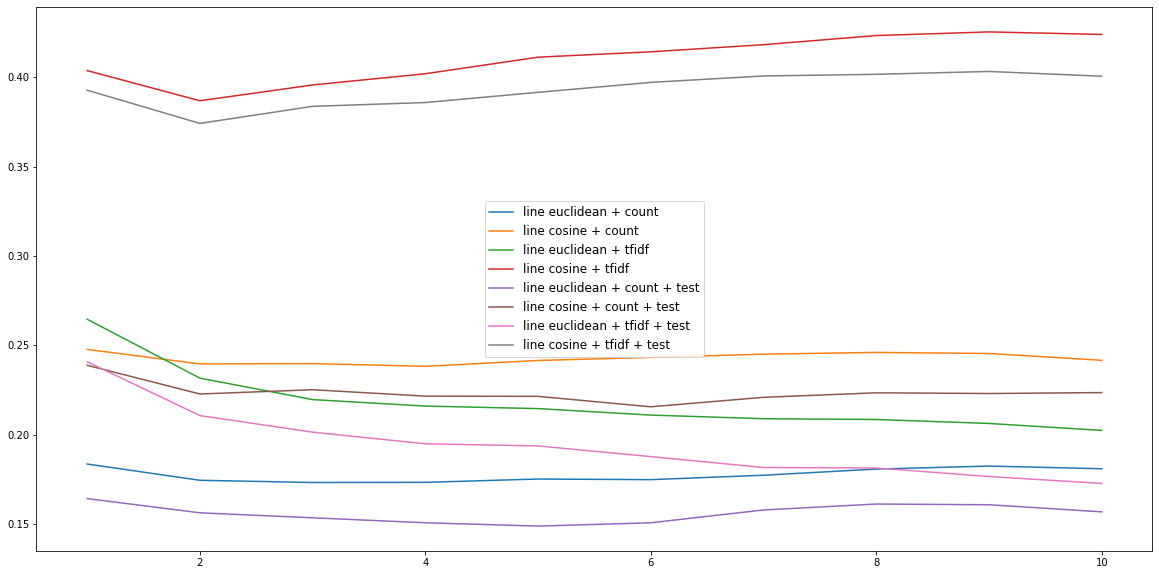

In [33]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_eucl, label = "line euclidean + count")
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_cosine, label = "line cosine + count")
plt.plot(np.arange(1, 11), tfidf_brute_results_eucl, label = "line euclidean + tfidf")
plt.plot(np.arange(1, 11), tfidf__brute_results_cosine, label = "line cosine + tfidf")
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_eucl_test, label = "line euclidean + count + test")
plt.plot(np.arange(1, 11), CountVectorizer_brute_results_cosine_test, label = "line cosine + count + test")
plt.plot(np.arange(1, 11), tfidf_brute_results_eucl_test, label = "line euclidean + tfidf + test")
plt.plot(np.arange(1, 11), tfidf__brute_results_cosine_test, label = "line cosine + tfidf + test")
plt.legend(loc = 'best', fontsize = 'large')
plt.show()

### Результаты на тестовой выборке слегка ниже, чем на тренировачном наборе. Причиной этого скорее всего служит то, что этих (тестовых) данных алгоритм ранее не видел